In [2]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,InputLayer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.optimizers import Adam
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

In [46]:
df= pd.read_csv('energy/energy/bestFeatures.csv')
df

,datetime,hour,midnight_flag,part_of_day,humidity,feelslike,temp,sensor_temp,Consumption (kWh)
0,2023-11-02 19:00:00,19,False,2,97.650,5.30,8.50,20.913295,0.92
1,2023-11-02 19:30:00,19,False,2,96.495,5.10,8.45,20.971098,3.14
2,2023-11-02 20:00:00,20,False,2,95.340,4.90,8.40,21.028902,0.96
3,2023-11-02 20:30:00,20,False,2,94.745,4.85,8.35,21.052023,0.92
4,2023-11-02 21:00:00,21,False,6,94.150,4.80,8.30,21.075145,0.88
...,...,...,...,...,...,...,...,...,...
1300,2023-11-29 21:00:00,21,False,6,90.380,-4.60,-1.90,25.606936,0.88
1301,2023-11-29 21:30:00,21,False,6,89.740,-4.55,-1.85,25.583815,0.84
1302,2023-11-29 22:00:00,22,False,6,89.100,-4.50,-1.80,25.560694,0.05
1303,2023-11-29 22:30:00,22,False,6,90.105,-4.85,-1.65,25.606936,0.18


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           1305 non-null   object 
 1   hour               1305 non-null   int64  
 2   midnight_flag      1305 non-null   bool   
 3   part_of_day        1305 non-null   int64  
 4   humidity           1305 non-null   float64
 5   feelslike          1305 non-null   float64
 6   temp               1305 non-null   float64
 7   sensor_temp        1305 non-null   float64
 8   Consumption (kWh)  1305 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(1)
memory usage: 83.0+ KB


In [48]:
df.isnull().sum()

datetime             0
hour                 0
midnight_flag        0
part_of_day          0
humidity             0
feelslike            0
temp                 0
sensor_temp          0
Consumption (kWh)    0
dtype: int64

In [49]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Split 'datetime' into date, month, year, and time columns
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time

# Display the updated DataFrame
print(df[['date', 'month', 'year', 'time']])


            date  month  year      time
0     2023-11-02     11  2023  19:00:00
1     2023-11-02     11  2023  19:30:00
2     2023-11-02     11  2023  20:00:00
3     2023-11-02     11  2023  20:30:00
4     2023-11-02     11  2023  21:00:00
...          ...    ...   ...       ...
1300  2023-11-29     11  2023  21:00:00
1301  2023-11-29     11  2023  21:30:00
1302  2023-11-29     11  2023  22:00:00
1303  2023-11-29     11  2023  22:30:00
1304  2023-11-29     11  2023  23:00:00

[1305 rows x 4 columns]


In [50]:
df

,datetime,hour,midnight_flag,part_of_day,humidity,feelslike,temp,sensor_temp,Consumption (kWh),date,month,year,time
0,2023-11-02 19:00:00,19,False,2,97.650,5.30,8.50,20.913295,0.92,2023-11-02,11,2023,19:00:00
1,2023-11-02 19:30:00,19,False,2,96.495,5.10,8.45,20.971098,3.14,2023-11-02,11,2023,19:30:00
2,2023-11-02 20:00:00,20,False,2,95.340,4.90,8.40,21.028902,0.96,2023-11-02,11,2023,20:00:00
3,2023-11-02 20:30:00,20,False,2,94.745,4.85,8.35,21.052023,0.92,2023-11-02,11,2023,20:30:00
4,2023-11-02 21:00:00,21,False,6,94.150,4.80,8.30,21.075145,0.88,2023-11-02,11,2023,21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2023-11-29 21:00:00,21,False,6,90.380,-4.60,-1.90,25.606936,0.88,2023-11-29,11,2023,21:00:00
1301,2023-11-29 21:30:00,21,False,6,89.740,-4.55,-1.85,25.583815,0.84,2023-11-29,11,2023,21:30:00
1302,2023-11-29 22:00:00,22,False,6,89.100,-4.50,-1.80,25.560694,0.05,2023-11-29,11,2023,22:00:00
1303,2023-11-29 22:30:00,22,False,6,90.105,-4.85,-1.65,25.606936,0.18,2023-11-29,11,2023,22:30:00


In [42]:
import pandas as pd
import plotly.express as px

# Assuming the data is stored in a DataFrame named 'df'
# Convert 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Filter data for daytime (6:00 to 20:00) and nighttime (20:00 to 6:00)
daytime_data = df[(df['datetime'].dt.hour >= 6) & (df['datetime'].dt.hour < 20)]
nighttime_data = df[(df['datetime'].dt.hour >= 20) | (df['datetime'].dt.hour < 6)]

# Calculate average energy consumption for daytime and nighttime
avg_daytime_consumption = daytime_data['Consumption (kWh)'].mean()
avg_nighttime_consumption = nighttime_data['Consumption (kWh)'].mean()

# Create a DataFrame for plotting
data = {'Time of Day': ['Daytime', 'Nighttime'],
        'Average Energy Consumption (kWh)': [avg_daytime_consumption, avg_nighttime_consumption]}

# Create a bar plot using Plotly
fig = px.bar(data, x='Time of Day', y='Average Energy Consumption (kWh)',
             title='Average Energy Consumption During Daytime and Nighttime',
             color='Time of Day', color_discrete_map={'Daytime': 'lightgreen', 'Nighttime': 'skyblue'})

# Show the plot
fig.show()


In [12]:
import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named 'df'

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by date and calculate the mean consumption for each day
daily_consumption = df.groupby('date')['Consumption (kWh)'].mean().reset_index()

# Plotting energy consumption with day using Plotly
fig = px.line(daily_consumption, x='date', y='Consumption (kWh)', title='Average Daily Energy Consumption')
fig.update_xaxes(title='Date', tickangle=45)
fig.update_yaxes(title='Average Consumption (kWh)')
fig.show()


In [22]:
import plotly.express as px
import pandas as pd

# Assuming the dataset is loaded into a DataFrame named 'data'

# Filter the data for daytime records (6 AM to 6 PM) and nighttime records (6 PM to 6 AM)
daytime_data = df[(df['hour'] >= 6) & (df['hour'] <= 18)]
nighttime_data = df[((df['hour'] >= 18) & (df['hour'] <= 23)) | ((df['hour'] >= 0) & (df['hour'] <= 6))]

# Group by date and sum the daytime and nighttime energy consumption separately
daytime_consumption = daytime_data.groupby('date')['Consumption (kWh)'].sum().reset_index()
nighttime_consumption = nighttime_data.groupby('date')['Consumption (kWh)'].sum().reset_index()

# Plotting both daytime and nighttime energy consumption using Plotly line chart
fig = px.line()

# Add daytime energy consumption line
fig.add_scatter(x=daytime_consumption['date'], y=daytime_consumption['Consumption (kWh)'],
                mode='lines', name='Daytime', line=dict(color='orange'))

# Add nighttime energy consumption line
fig.add_scatter(x=nighttime_consumption['date'], y=nighttime_consumption['Consumption (kWh)'],
                mode='lines', name='Nighttime', line=dict(color='blue'))

# Update chart labels and title
fig.update_layout(title='Daytime vs Nighttime Energy Consumption',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Energy Consumption (kWh)'),
                  xaxis_tickangle=-45)

fig.show()


In [44]:
import plotly.express as px
import pandas as pd
# Assuming 'df' is your DataFrame with the relevant columns
numeric_columns = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix


# Assuming 'correlation_matrix' is the calculated correlation matrix
# If not, calculate it using your data

# Sample correlation matrix (replace this with your actual correlation matrix)
# correlation_matrix = your_data_frame.corr()

# Create a heatmap using Plotly
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(title="Correlation Heatmap",
                  width=800,
                  height=600)

fig.show()


# Trying out models

In [3]:
X = df.drop(columns = ['Consumption (kWh)','datetime'], axis=1)
y = df['Consumption (kWh)']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Liner Regression

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.4127249372209821, 0.19128697794084026)

(0.4127249372209821, 0.19128697794084026)

## Random Forest Regressor

In [5]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.429057029872449, 0.1592850928750824)

In [6]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Method of selecting samples for training each tree
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [7]:
rf_best = RandomForestRegressor(
    bootstrap=True, 
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=10, 
    n_estimators=300,
    random_state=42
)

rf_best.fit(X_train, y_train)

y_pred_rf_best = rf_best.predict(X_test)

mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

mse_rf_best, r2_rf_best

(0.3747990079304718, 0.2656008614135721)

## Gradient Boosting Regressor

In [8]:
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)

y_pred_gbm = gbm_reg.predict(X_test)

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)

mse_gbm, r2_gbm
(0.3944275765319698, 0.22713970338591016)

(0.3944275765319698, 0.22713970338591016)

In [9]:
gbm_param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],               # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 3, 4],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3],        # Minimum number of samples required at a leaf node
    'subsample': [0.8, 0.9, 1.0]          # Fraction of samples to be used for fitting individual base learners
}

gbm = GradientBoostingRegressor(random_state=42)

gbm_grid_search = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

gbm_grid_search.fit(X_train, y_train)

gbm_grid_search.best_params_


gbm_best = GradientBoostingRegressor(
    learning_rate=0.01, 
    max_depth=3, 
    min_samples_leaf=3, 
    min_samples_split=2, 
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

gbm_best.fit(X_train, y_train)

y_pred_gbm_best = gbm_best.predict(X_test)

mse_gbm_best = mean_squared_error(y_test, y_pred_gbm_best)
r2_gbm_best = r2_score(y_test, y_pred_gbm_best)

mse_gbm_best, r2_gbm_best

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; tot

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_l

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_l

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_sam

[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_le

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_l

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_l

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_l

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_ssamples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time

[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_samples_l

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_l

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_l

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_l

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, m

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, m

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, m

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200,
 'subsample': 0.8}

In [10]:
gbm_best = GradientBoostingRegressor(
    learning_rate=0.01, 
    max_depth=3, 
    min_samples_leaf=3, 
    min_samples_split=2, 
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

gbm_best.fit(X_train, y_train)

y_pred_gbm_best = gbm_best.predict(X_test)

mse_gbm_best = mean_squared_error(y_test, y_pred_gbm_best)
r2_gbm_best = r2_score(y_test, y_pred_gbm_best)

mse_gbm_best, r2_gbm_best

(0.3731099642295275, 0.26891045458954543)

timators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learn

(0.3731099642295275, 0.26891045458954543)

## MLP Regressor


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_reg = MLPRegressor(random_state=42, max_iter=1000)
mlp_reg.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_reg.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mse_mlp, r2_mlp

f=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.9; tot

(0.38224142487767043, 0.2510178329653281)

In [12]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100),(200,200)],  # Different layer sizes and structures
    'activation': ['tanh', 'relu'],                                # Activation functions
    'solver': ['sgd', 'adam'],                                     # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01],                                # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive'],                     # Learning rate schedule
    'max_iter': [500, 1000]                                        # Maximum number of iterations
}

mlp = MLPRegressor(random_state=42)

mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, 
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

mlp_grid_search.fit(X_train_scaled, y_train)

mlp_grid_search.best_params_

Fitting 3 folds for each of 240 candidates, totalling 720 fits
al time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=300, subsample=1.0; totles_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_sam

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, m

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=3

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, m

[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, subsample=0.8;[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, min_samples_split=2, 

[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, m

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, m

[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, m

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=500, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=1000, solver=adam; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_si

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 500,
 'solver': 'sgd'}

In [13]:
mlp_best = MLPRegressor(
    activation='relu', 
    alpha=0.01, 
    hidden_layer_sizes=(50, 50), 
    learning_rate='adaptive', 
    max_iter=500, 
    solver='sgd',
    random_state=42
)

mlp_best.fit(X_train_scaled, y_train)

y_pred_mlp_best = mlp_best.predict(X_test_scaled)

mse_mlp_best = mean_squared_error(y_test, y_pred_mlp_best)
r2_mlp_best = r2_score(y_test, y_pred_mlp_best)

mse_mlp_best, r2_mlp_best

(0.41546328876422167, 0.1859213206900212)

In [53]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming your data is loaded into a DataFrame named 'data'
# Ensure the 'datetime' column is set as the index and is in datetime format

# Check for stationarity
# Example assuming your column with consumption is named 'Consumption'

# Determine differencing requirements
# Example assuming your data is daily and you need first-order differencing
data_diff = data['Consumption (kWh)'].diff().dropna()

# Check for stationarity after differencing
data_diff.plot()
plt.show()

# Determine p and q values using ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff)
plt.show()

plot_pacf(data_diff)
plt.show()

# Fit ARIMA model
model = ARIMA(data['Consumption (kWh)'], order=(p, d, q))  # Replace p, d, q with determined values
results = model.fit()

# Summary of the model
print(results.summary())


KeyError: 'Consumption (kWh)'

## SARIMA

In [14]:
# Function to perform the Augmented Dickey-Fuller test for stationarity
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series, autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations Used']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

adf_test(df['Consumption (kWh)'], 'Consumption (kWh)')
sarima_model = pm.auto_arima(df['Consumption (kWh)'],
                             seasonal=True, m=48,  
                             d=0, D=1,            
                             max_p=3, max_q=3,    
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True)

sarima_model.summary()
var_df = df[['hour', 'humidity', 'feelslike', 'Consumption (kWh)']].dropna()

model = VAR(var_df)

var_results = model.fit(maxlags=15, ic='aic')

var_results_summary = var_results.summary()
var_results_summary
Correlation matrix of residuals
                         hour  humidity  feelslike  Consumption (kWh)
hour                 1.000000  0.000744   0.002864           0.182316
humidity             0.000744  1.000000  -0.336647           0.005189
feelslike            0.002864 -0.336647   1.000000          -0.048696
Consumption (kWh)    0.182316  0.005189  -0.048696           1.000000


Augmented Dickey-Fuller Test: Consumption (kWh)
ADF Test Statistic     -1.038633e+01
p-value                 2.075468e-18
# Lags Used             1.500000e+01
# Observations Used     1.289000e+03
Critical Value (1%)    -3.435433e+00
Critical Value (5%)    -2.863785e+00
Critical Value (10%)   -2.567965e+00
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [ ]:
sarima_model = pm.auto_arima(df['Consumption (kWh)'],
                             seasonal=True, m=48,  
                             d=0, D=1,            
                             max_p=3, max_q=3,    
                             trace=True,
                             error_action='ignore',  
                             suppress_warnings=True)

sarima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[48] intercept   : AIC=inf, Time=240.59 sec
 ARIMA(0,0,0)(0,1,0)[48] intercept   : AIC=2943.349, Time=1.79 sec
 ARIMA(1,0,0)(1,1,0)[48] intercept   : AIC=2563.326, Time=36.77 sec
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=4, n_esti

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, m

[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate=constant, max_iter=500, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate=constant, max_iter=1000, solver=sgd; total time=   1.1s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   1.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.5s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.6s
[CV] END activation

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, m

[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.01, 

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=constant, max_iter=1000, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=1000, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=constant, max_iter=1000, solver=sgd; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.1s
[CV] END activat

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   0.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.1s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate=constant, max_iter=500, solver=sgd; total time=   0.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate=constant, max_iter=500, solver=sgd; total time=   1.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate=adaptive, max_iter=500, solver=sgd; total time=   2.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.7s
[CV] END activation=relu, alpha=0.001, hidden_layer_sizes=(50,), learning_rate=adaptive, max_iter=1000, solver=sgd; total time=   0.2s
[CV] END activation=rel

## VAR

In [4]:
var_df = df[['hour', 'humidity', 'feelslike', 'Consumption (kWh)']].dropna()

model = VAR(var_df)

var_results = model.fit(maxlags=15, ic='aic')

var_results_summary = var_results.summary()
var_results_summary

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 21, Dec, 2023
Time:                     11:02:50
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                  -0.817069
Nobs:                     1290.00    HQIC:                  -1.42701
Log likelihood:          -5920.90    FPE:                   0.166420
AIC:                     -1.79352    Det(Omega_mle):        0.138338
--------------------------------------------------------------------
Results for equation hour
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         6.154764         1.481338            4.155           0.000
L1.hour                       0.854341         0.028621           29.850           0.000
L1.humidity                  

C:\Users\ACSASS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency 30T will be used.

C:\Users\ACSASS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency 30T will be used.

C:\Users\ACSASS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency 30T will be used.



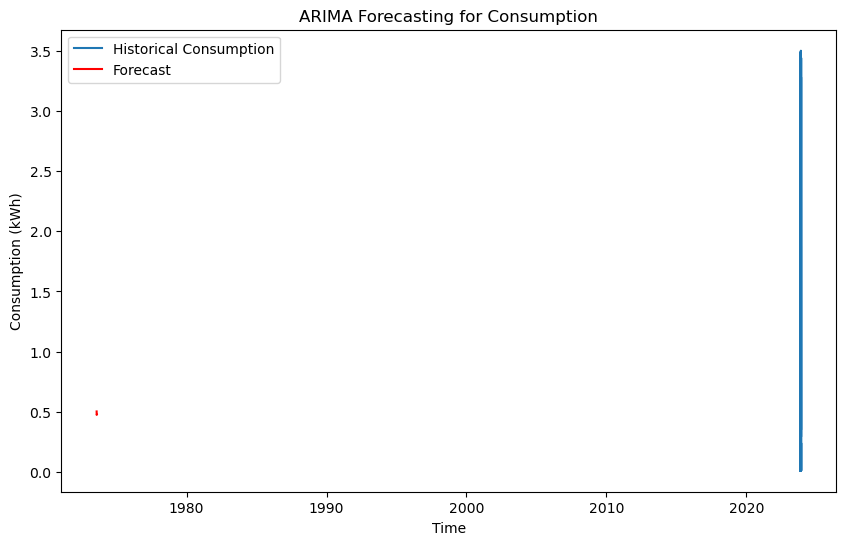

Forecasted values: 2023-11-29 23:30:00    0.502461
2023-11-30 00:00:00    0.485844
2023-11-30 00:30:00    0.473954
2023-11-30 01:00:00    0.475527
2023-11-30 01:30:00    0.476199
Freq: 30T, Name: predicted_mean, dtype: float64


In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
df= pd.read_csv('energy/energy/bestFeatures.csv')
# Assuming your dataset is loaded into a DataFrame called 'df'
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Assuming 'Consumption (kWh)' is the target column for forecasting
data = df['Consumption (kWh)']

# Fit ARIMA model
model = ARIMA(data, order=(2, 1, 1))  # Example order - (p, d, q)
model_fit = model.fit()

# Forecast future values
forecast_steps = 5  # Number of future steps to predict
forecast = model_fit.forecast(steps=forecast_steps)



print("Forecasted values:", forecast)


In [23]:
forecast

2023-11-29 23:30:00    0.502461
2023-11-30 00:00:00    0.485844
2023-11-30 00:30:00    0.473954
2023-11-30 01:00:00    0.475527
2023-11-30 01:30:00    0.476199
                         ...   
2023-12-01 23:00:00    0.476045
2023-12-01 23:30:00    0.476045
2023-12-02 00:00:00    0.476045
2023-12-02 00:30:00    0.476045
2023-12-02 01:00:00    0.476045
Freq: 30T, Name: predicted_mean, Length: 100, dtype: float64